SOA_List=[8, 4, 8, 6, 8, 4, 4, 4, 8, 8, 4, 6, 4, 4, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 4, 4, 4, 4, 6, 8, 6, 4, 8, 8, 8, 6, 4, 4, 8, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s
21


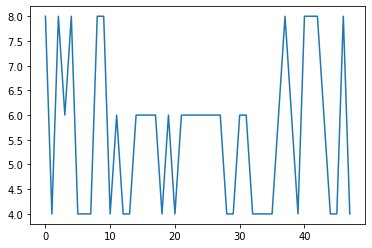

In [30]:

import numpy as np
import random
import matplotlib.pyplot as plt
TR=2
SOA_List=[2*TR]*19+[3*TR]*19+[4*TR]*10
random.shuffle(SOA_List)
print(f"SOA_List={SOA_List}")
plt.figure()
plt.plot(SOA_List)
print(f"number of 4s={sum((np.asarray(SOA_List)==4)*1)}")
print(f"number of 6s={sum((np.asarray(SOA_List)==6)*1)}")
print(f"number of 8s={sum((np.asarray(SOA_List)==8)*1)}")
print(f"total time={np.sum(SOA_List)} s")
print(np.sum(1*(np.diff(SOA_List)==0)))
# if np.sum(1*(np.diff(SOA_List)==0))<=0:
#     break

In [37]:
# recognition trial order
# This code generate the trial order of recognition run. This is part of the old code in http://127.0.0.1:9206/notebooks/users/kp578/rtSynth/kp_scratch/expcode/recognition%20trial.ipynb

import os
os.chdir('/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/expScripts/recognition/')

import random,string,pickle
import pandas as pd
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# In total there are 48 trials.
# quarter counterbalance, 3 repetition of each image in each quarter (36 trial)
# prevent back to back repetition 
# generate a new order for each subject and each new recognition run.
TR=2

# generate a random list containing 19 4s , 19 6s and 10 8s
def get_SOA_List():
    SOA_List=[2*TR]*19+[3*TR]*19+[4*TR]*10
    random.shuffle(SOA_List)
    print(f"SOA_List={SOA_List}")
    # plt.figure()
    # plt.plot(SOA_List)
    print(f"number of 4s={sum((np.asarray(SOA_List)==4)*1)}")
    print(f"number of 6s={sum((np.asarray(SOA_List)==6)*1)}")
    print(f"number of 8s={sum((np.asarray(SOA_List)==8)*1)}")
    print(f"total time={np.sum(SOA_List)} s")
    return SOA_List

for subj in tqdm(range(1,51)):
    
    order=[]
    quarter=0

    NumTrial=12 # number Of Trials In A Quater
    NumRep=3 # number Of Repetion Of Single Image In A Quater
    NumImg=4 # number of unique images
    while quarter<4:
        back2backRep_morph=True #indicate that the same morph images are repeated back to back
        # back2backRep_cat=True #indicate that the images in the same cat are repeated back to back 
        # Cat is defined as {'cat1':[A,B,C],'cat2':[D,E,F],'cat3':[G,H,I],'cat4':[J,K,L]}
        while back2backRep_morph: # or back2backRep_cat: # only accept the order when both are false
            _order=np.asarray(random.sample(list(np.arange(NumTrial)),NumTrial))
            for i in range(NumImg):
                delimiter=np.arange(0,NumTrial+1,NumRep)
                _order[np.logical_and(_order>=delimiter[i],
                                      _order<delimiter[i+1])]=i
            if 0 not in np.diff(_order):
                back2backRep_morph = False    
            # # prevent same cat back2back repetition
            # _cat=np.array(_order)
            # for i in range(4):
            #     _cat[np.logical_and(_order>=np.arange(0,12+1,3)[i],
            #                           _order<np.arange(0,12+1,3)[i+1])]=i
            # if 0 not in np.diff(_cat):
            #     back2backRep_cat = False    

        #check if this particular sequence already exists in generated orders
        exist=0
        for _ in order:
            if np.all(_order==_):
                exist=1
        if len(order)>0:
            if order[-1][-1]==_order[0]: #avoid tail-head repetion between two quaters
                exist=1
        # if this particular sequence does not already exists in generated orders, store it
        if exist==0:
            order.append(_order)
            quarter=quarter+1
    # convert to a single array
    _=np.array([])
    for a in order:
        _=np.concatenate((_, a), axis=0)
    _order=_
    # convert to letters
    order=[]
    alpha = string.ascii_uppercase
    for i in range(len(_order)):
        order.append(alpha[int(_order[i])])

    # store as csv for records
    class imageProperty():
        def __init__(self):
            self.viewPointOrder=[]
            for i in range(NumImg):
                l=np.arange(3, 40, 3)
                random.shuffle(l)
                self.viewPointOrder.append(list(l))
            save_obj(self.viewPointOrder,'./viewPointOrder/recognitionTrial_'+str(subj))
        def getPath(self,image):
            if image in ['A','B']:
                morphDict={'A':1, 'B':100}
                axis='bedChair'
                button_left='Bed'
                button_right='Chair'
                # if np.random.binomial(1, 0.5, 1)[0]==1: # randomly switch the button position
                #     button_left='Bed'
                #     button_right='Chair'
                # else:
                #     button_left='Chair'
                #     button_right='Bed'
            elif image in ['C','D']:
                morphDict={'C':1, 'D':100}
                axis='tableBench'
                button_left='Table'
                button_right='Bench'
                # if np.random.binomial(1, 0.5, 1)[0]==1: # randomly switch the button position
                #     button_left='Table'
                #     button_right='Bench'
                # else:
                #     button_left='Bench'
                #     button_right='Table'
            viewPoint=self.viewPointOrder[alpha.index(image)][0]
            path='./carchair_exp/{}_{}_{}.png'.format(axis,
                                                       morphDict[image],
                                                       viewPoint)
            self.viewPointOrder[alpha.index(image)].pop(0)
            return path,morphDict[image],axis,button_left,button_right,viewPoint
            
    orders_df = pd.DataFrame(columns=['time','imnum','dur','weight','imcode','path',
                                      'corrAns','axis','button_left','button_right','viewPoint'])
    imagePath=imageProperty()

    cumTime=6
    SOA_List = get_SOA_List()
    for currImg in range(len(order)):
        path,morph,axis,button_left,button_right,viewPoint=imagePath.getPath(order[currImg])

        p=np.random.uniform(0,1,1)
        # if p<0.4:
        #     SOA=2*TR
        # elif p<0.8:
        #     SOA=3*TR
        # else:
        #     SOA=4*TR
        SOA = SOA_List[currImg]
        orders_df=orders_df.append({'time':cumTime,
                                    'imnum':_order[currImg],
                                    'dur':1.0,
                                    'weight':1,
                                    'imcode':order[currImg],
                                    'imgPath':path,
                                    'corrAns':morph,
                                    'axis':axis,
                                    'button_left':button_left,
                                    'button_right':button_right,
                                    'viewPoint':viewPoint},
                                   ignore_index=True)
        cumTime=cumTime+SOA
    orders_df.to_csv('orders/recognitionOrders_{}.csv'.format(subj))  


  0%|          | 0/50 [00:00<?, ?it/s]

SOA_List=[8, 6, 4, 6, 6, 4, 4, 4, 8, 6, 4, 6, 4, 8, 6, 6, 4, 4, 6, 6, 6, 8, 8, 6, 6, 6, 4, 4, 6, 4, 6, 4, 6, 4, 4, 8, 6, 8, 6, 8, 4, 6, 4, 8, 8, 4, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


  2%|▏         | 1/50 [00:00<00:24,  1.97it/s]

SOA_List=[8, 4, 4, 8, 4, 8, 6, 6, 8, 4, 6, 6, 4, 4, 6, 8, 6, 6, 4, 6, 6, 6, 6, 8, 4, 6, 6, 6, 4, 8, 8, 6, 6, 4, 4, 4, 4, 4, 8, 6, 4, 4, 8, 4, 6, 4, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


  4%|▍         | 2/50 [00:01<00:24,  1.95it/s]

SOA_List=[6, 4, 4, 4, 8, 6, 4, 6, 6, 4, 6, 4, 6, 8, 8, 6, 6, 4, 6, 4, 8, 4, 8, 4, 6, 4, 4, 4, 6, 8, 4, 6, 8, 6, 4, 8, 4, 4, 4, 4, 6, 6, 8, 6, 6, 6, 6, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


  6%|▌         | 3/50 [00:01<00:24,  1.96it/s]

SOA_List=[4, 6, 8, 4, 6, 8, 6, 6, 4, 6, 6, 4, 6, 4, 6, 6, 8, 4, 8, 4, 4, 4, 8, 4, 6, 4, 6, 4, 4, 6, 4, 4, 6, 8, 6, 6, 8, 4, 4, 6, 8, 8, 6, 4, 4, 6, 8, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


  8%|▊         | 4/50 [00:01<00:22,  2.06it/s]

SOA_List=[4, 4, 8, 8, 6, 4, 4, 4, 6, 4, 4, 6, 6, 4, 4, 6, 8, 6, 4, 6, 6, 8, 8, 8, 6, 6, 8, 6, 4, 6, 4, 6, 4, 4, 6, 6, 4, 8, 6, 8, 4, 4, 4, 6, 8, 4, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 10%|█         | 5/50 [00:02<00:20,  2.15it/s]

SOA_List=[4, 6, 8, 8, 4, 4, 8, 4, 4, 4, 4, 8, 6, 4, 4, 6, 6, 6, 6, 4, 8, 6, 8, 6, 4, 4, 6, 6, 8, 4, 6, 6, 6, 8, 4, 6, 6, 6, 8, 4, 6, 4, 8, 6, 6, 4, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 12%|█▏        | 6/50 [00:02<00:21,  2.09it/s]

SOA_List=[4, 6, 8, 4, 6, 4, 6, 4, 4, 6, 6, 4, 4, 6, 8, 8, 8, 4, 8, 6, 6, 8, 6, 8, 6, 4, 4, 6, 6, 4, 4, 6, 6, 8, 4, 4, 4, 4, 6, 6, 4, 6, 6, 6, 8, 8, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 14%|█▍        | 7/50 [00:03<00:20,  2.10it/s]

SOA_List=[4, 4, 4, 8, 4, 6, 8, 8, 6, 6, 4, 4, 4, 4, 4, 4, 6, 4, 6, 6, 6, 8, 8, 4, 8, 6, 6, 8, 4, 4, 6, 6, 8, 6, 6, 4, 4, 6, 4, 4, 6, 8, 6, 6, 6, 8, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 16%|█▌        | 8/50 [00:03<00:19,  2.14it/s]

SOA_List=[6, 8, 6, 4, 6, 6, 4, 6, 6, 8, 6, 8, 8, 4, 8, 6, 6, 6, 8, 6, 4, 4, 4, 8, 4, 8, 8, 6, 4, 4, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 4, 4, 4, 4, 4, 6, 4, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 18%|█▊        | 9/50 [00:04<00:20,  1.97it/s]

SOA_List=[4, 8, 6, 6, 8, 8, 4, 4, 4, 4, 6, 4, 6, 4, 6, 4, 8, 6, 6, 6, 8, 6, 6, 4, 4, 4, 6, 4, 6, 6, 8, 4, 6, 8, 4, 4, 6, 8, 4, 6, 8, 6, 8, 4, 4, 4, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 20%|██        | 10/50 [00:04<00:19,  2.07it/s]

SOA_List=[6, 8, 6, 8, 8, 8, 6, 4, 8, 4, 6, 6, 4, 6, 4, 4, 4, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 8, 8, 6, 6, 4, 4, 8, 6, 4, 6, 4, 6, 4, 4, 6, 4, 6, 8, 8, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 22%|██▏       | 11/50 [00:05<00:19,  1.96it/s]

SOA_List=[4, 6, 8, 6, 6, 8, 6, 8, 6, 6, 4, 4, 6, 4, 6, 6, 4, 6, 6, 4, 8, 4, 8, 4, 4, 6, 4, 6, 8, 8, 4, 4, 6, 4, 6, 8, 8, 6, 4, 4, 4, 6, 4, 8, 4, 6, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 24%|██▍       | 12/50 [00:06<00:23,  1.60it/s]

SOA_List=[8, 6, 4, 6, 8, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 8, 4, 8, 4, 8, 6, 6, 6, 8, 4, 4, 8, 6, 4, 4, 4, 6, 6, 4, 4, 6, 4, 6, 4, 4, 4, 4, 8, 8, 4, 8, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 26%|██▌       | 13/50 [00:06<00:21,  1.72it/s]

SOA_List=[4, 8, 4, 6, 4, 4, 6, 6, 6, 4, 4, 4, 8, 6, 8, 4, 8, 6, 4, 6, 4, 8, 6, 4, 6, 4, 4, 4, 6, 4, 6, 6, 8, 6, 8, 6, 4, 6, 6, 8, 4, 4, 6, 6, 6, 8, 8, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 28%|██▊       | 14/50 [00:07<00:19,  1.82it/s]

SOA_List=[6, 4, 8, 4, 4, 4, 4, 4, 6, 4, 6, 6, 4, 4, 4, 6, 6, 6, 6, 4, 4, 8, 6, 8, 8, 6, 8, 4, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 8, 8, 4, 8, 4, 8, 8, 6, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 30%|███       | 15/50 [00:07<00:18,  1.92it/s]

SOA_List=[6, 4, 6, 8, 4, 4, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 4, 4, 8, 8, 8, 4, 6, 6, 6, 8, 6, 4, 4, 8, 6, 8, 4, 6, 4, 6, 4, 6, 4, 4, 6, 8, 4, 4, 8, 4, 6, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 32%|███▏      | 16/50 [00:08<00:18,  1.89it/s]

SOA_List=[4, 6, 6, 6, 4, 6, 4, 4, 8, 6, 4, 4, 8, 8, 4, 8, 6, 4, 4, 6, 8, 4, 4, 4, 6, 6, 6, 8, 8, 4, 6, 8, 8, 6, 4, 4, 4, 8, 6, 6, 6, 6, 4, 4, 6, 6, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 34%|███▍      | 17/50 [00:08<00:16,  1.94it/s]

SOA_List=[6, 4, 4, 4, 4, 6, 6, 6, 6, 4, 4, 8, 4, 8, 6, 6, 4, 8, 4, 8, 6, 4, 6, 4, 6, 6, 6, 8, 6, 6, 8, 4, 6, 8, 6, 4, 4, 4, 8, 4, 4, 8, 6, 4, 4, 6, 6, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 36%|███▌      | 18/50 [00:09<00:15,  2.05it/s]

SOA_List=[8, 4, 4, 6, 6, 6, 4, 4, 4, 8, 4, 6, 4, 8, 4, 6, 8, 8, 4, 6, 4, 8, 4, 8, 6, 6, 6, 8, 4, 6, 4, 6, 8, 6, 4, 4, 6, 6, 4, 4, 8, 6, 6, 6, 4, 4, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 38%|███▊      | 19/50 [00:09<00:14,  2.14it/s]

SOA_List=[6, 6, 6, 4, 6, 6, 4, 6, 4, 6, 4, 4, 8, 4, 6, 4, 8, 8, 8, 6, 4, 4, 6, 8, 4, 4, 6, 6, 4, 8, 4, 6, 6, 4, 8, 6, 6, 6, 4, 6, 4, 4, 6, 4, 8, 8, 4, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 40%|████      | 20/50 [00:10<00:13,  2.18it/s]

SOA_List=[4, 4, 4, 4, 6, 4, 4, 4, 8, 6, 6, 4, 4, 6, 6, 6, 6, 8, 6, 4, 4, 4, 4, 8, 8, 8, 6, 8, 4, 6, 8, 6, 4, 8, 6, 4, 6, 6, 8, 6, 6, 8, 4, 6, 4, 6, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 42%|████▏     | 21/50 [00:10<00:12,  2.26it/s]

SOA_List=[8, 8, 6, 6, 6, 4, 8, 4, 4, 6, 8, 8, 6, 4, 8, 4, 4, 4, 6, 6, 4, 6, 6, 4, 4, 6, 6, 8, 4, 8, 6, 4, 8, 6, 4, 4, 4, 4, 6, 6, 4, 8, 6, 4, 6, 6, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 44%|████▍     | 22/50 [00:10<00:12,  2.26it/s]

SOA_List=[8, 6, 6, 4, 6, 6, 6, 6, 8, 6, 6, 6, 8, 8, 8, 4, 6, 4, 4, 8, 4, 6, 6, 4, 4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 6, 8, 6, 4, 4, 4, 8, 8, 8, 4, 4, 6, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 46%|████▌     | 23/50 [00:11<00:11,  2.32it/s]

SOA_List=[8, 8, 4, 4, 6, 6, 4, 6, 8, 6, 6, 8, 8, 6, 6, 4, 6, 4, 6, 4, 8, 6, 6, 6, 4, 4, 6, 4, 6, 4, 6, 4, 4, 8, 4, 6, 8, 6, 4, 6, 4, 4, 4, 6, 8, 4, 8, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 48%|████▊     | 24/50 [00:11<00:11,  2.35it/s]

SOA_List=[4, 4, 8, 4, 4, 4, 6, 4, 8, 4, 8, 6, 4, 8, 6, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 8, 6, 6, 4, 4, 6, 8, 4, 4, 4, 4, 6, 6, 6, 8, 4, 6, 6, 8, 4, 8, 6, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 50%|█████     | 25/50 [00:12<00:10,  2.39it/s]

SOA_List=[8, 4, 4, 6, 8, 4, 6, 6, 6, 6, 8, 4, 4, 8, 4, 4, 6, 6, 6, 6, 4, 4, 6, 8, 8, 6, 8, 6, 4, 4, 6, 6, 6, 6, 6, 8, 4, 4, 4, 4, 8, 4, 4, 4, 6, 8, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 52%|█████▏    | 26/50 [00:12<00:11,  2.08it/s]

SOA_List=[4, 6, 4, 6, 6, 6, 4, 6, 6, 4, 6, 4, 4, 4, 8, 8, 4, 4, 4, 8, 4, 6, 8, 6, 4, 8, 6, 4, 4, 6, 4, 6, 6, 8, 4, 8, 6, 6, 6, 4, 4, 8, 6, 8, 4, 8, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 54%|█████▍    | 27/50 [00:13<00:11,  2.01it/s]

SOA_List=[4, 4, 4, 4, 6, 4, 4, 8, 4, 4, 6, 6, 4, 6, 6, 4, 6, 6, 4, 4, 6, 4, 8, 6, 6, 6, 6, 4, 6, 4, 6, 6, 8, 8, 4, 6, 4, 6, 8, 4, 8, 8, 8, 6, 8, 4, 8, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 56%|█████▌    | 28/50 [00:13<00:11,  1.90it/s]

SOA_List=[4, 6, 6, 4, 4, 4, 4, 8, 4, 8, 6, 6, 6, 4, 4, 6, 6, 4, 4, 4, 8, 8, 6, 6, 8, 6, 6, 8, 4, 4, 6, 8, 4, 6, 4, 4, 6, 8, 8, 6, 8, 6, 6, 6, 4, 6, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 58%|█████▊    | 29/50 [00:14<00:11,  1.82it/s]

SOA_List=[4, 6, 6, 4, 4, 8, 6, 4, 4, 4, 4, 8, 8, 6, 8, 4, 6, 4, 4, 8, 6, 4, 4, 6, 8, 4, 6, 4, 6, 4, 6, 6, 6, 6, 8, 4, 4, 8, 4, 6, 8, 6, 6, 6, 6, 8, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 60%|██████    | 30/50 [00:14<00:10,  1.91it/s]

SOA_List=[8, 4, 6, 6, 8, 4, 8, 4, 6, 4, 4, 6, 8, 8, 4, 8, 8, 4, 4, 6, 6, 4, 6, 4, 6, 6, 6, 4, 6, 4, 6, 8, 4, 6, 6, 8, 6, 6, 6, 4, 6, 4, 4, 4, 6, 4, 8, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 62%|██████▏   | 31/50 [00:15<00:10,  1.84it/s]

SOA_List=[6, 4, 8, 6, 4, 8, 4, 4, 6, 8, 8, 8, 4, 8, 6, 4, 8, 4, 8, 4, 6, 6, 6, 6, 4, 6, 6, 4, 4, 8, 4, 4, 6, 8, 6, 4, 6, 4, 6, 6, 6, 6, 4, 4, 6, 4, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 64%|██████▍   | 32/50 [00:16<00:09,  1.88it/s]

SOA_List=[6, 4, 6, 8, 6, 4, 4, 8, 8, 4, 6, 6, 4, 6, 4, 6, 4, 6, 4, 8, 8, 8, 6, 6, 4, 6, 6, 8, 6, 6, 4, 6, 8, 6, 4, 4, 4, 4, 4, 6, 4, 8, 6, 4, 6, 4, 4, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 66%|██████▌   | 33/50 [00:16<00:08,  1.93it/s]

SOA_List=[6, 4, 4, 6, 8, 4, 8, 6, 4, 4, 4, 6, 6, 8, 8, 6, 4, 8, 6, 6, 6, 4, 6, 4, 8, 6, 4, 8, 8, 4, 4, 6, 8, 4, 6, 6, 4, 8, 6, 4, 4, 4, 6, 4, 6, 6, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 68%|██████▊   | 34/50 [00:16<00:08,  1.97it/s]

SOA_List=[6, 6, 4, 4, 4, 6, 8, 4, 4, 4, 8, 8, 4, 6, 6, 4, 6, 4, 4, 6, 4, 4, 4, 6, 4, 8, 4, 8, 8, 6, 6, 4, 6, 6, 6, 8, 6, 6, 4, 8, 8, 4, 8, 4, 6, 6, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 70%|███████   | 35/50 [00:17<00:07,  1.99it/s]

SOA_List=[6, 4, 4, 4, 4, 6, 6, 6, 8, 4, 4, 4, 8, 4, 6, 4, 6, 4, 6, 4, 6, 6, 8, 6, 4, 4, 6, 4, 8, 6, 8, 8, 4, 8, 8, 6, 8, 8, 6, 4, 6, 6, 4, 6, 4, 4, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 72%|███████▏  | 36/50 [00:18<00:09,  1.51it/s]

SOA_List=[8, 4, 6, 8, 4, 4, 6, 4, 8, 4, 4, 8, 6, 6, 6, 8, 6, 4, 8, 8, 6, 6, 6, 8, 6, 4, 8, 6, 4, 4, 6, 4, 4, 6, 4, 6, 6, 4, 6, 8, 4, 6, 4, 4, 6, 6, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 74%|███████▍  | 37/50 [00:19<00:08,  1.47it/s]

SOA_List=[6, 6, 4, 6, 6, 8, 8, 6, 6, 4, 4, 4, 8, 6, 4, 4, 6, 6, 4, 8, 4, 4, 4, 8, 6, 6, 4, 4, 8, 6, 8, 6, 6, 6, 8, 6, 4, 4, 4, 4, 6, 4, 4, 8, 8, 6, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 76%|███████▌  | 38/50 [00:20<00:09,  1.33it/s]

SOA_List=[8, 6, 4, 8, 8, 4, 4, 6, 8, 4, 4, 4, 6, 8, 4, 6, 4, 4, 6, 6, 4, 6, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 6, 4, 6, 6, 4, 6, 8, 8, 8, 6, 4, 6, 4, 6, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 78%|███████▊  | 39/50 [00:20<00:07,  1.39it/s]

SOA_List=[4, 6, 6, 4, 8, 8, 4, 8, 4, 6, 4, 6, 6, 6, 6, 4, 8, 4, 4, 6, 6, 8, 6, 4, 4, 6, 6, 6, 8, 6, 6, 4, 4, 4, 4, 6, 6, 4, 6, 4, 4, 8, 8, 4, 4, 8, 6, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 80%|████████  | 40/50 [00:21<00:07,  1.39it/s]

SOA_List=[6, 6, 8, 8, 6, 4, 4, 6, 6, 8, 6, 4, 6, 6, 4, 8, 4, 6, 8, 6, 6, 4, 4, 6, 8, 6, 6, 4, 6, 8, 4, 8, 4, 8, 6, 6, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, 4, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 82%|████████▏ | 41/50 [00:22<00:05,  1.50it/s]

SOA_List=[6, 6, 4, 8, 6, 4, 6, 4, 4, 6, 8, 8, 4, 8, 8, 8, 4, 4, 6, 6, 4, 6, 4, 4, 4, 4, 4, 6, 6, 8, 6, 6, 6, 6, 6, 4, 4, 4, 8, 4, 4, 6, 6, 8, 8, 6, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 84%|████████▍ | 42/50 [00:22<00:04,  1.65it/s]

SOA_List=[4, 4, 6, 6, 4, 4, 6, 4, 8, 6, 4, 8, 6, 6, 4, 4, 8, 6, 6, 6, 6, 6, 8, 4, 8, 6, 8, 4, 8, 4, 4, 8, 6, 4, 4, 4, 4, 8, 4, 4, 6, 6, 6, 8, 4, 6, 6, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 86%|████████▌ | 43/50 [00:23<00:04,  1.63it/s]

SOA_List=[4, 4, 6, 4, 4, 8, 4, 6, 6, 6, 6, 4, 6, 6, 4, 4, 4, 8, 4, 6, 6, 4, 4, 6, 8, 4, 6, 6, 6, 6, 4, 4, 6, 4, 6, 8, 8, 4, 6, 4, 8, 8, 8, 8, 6, 8, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 88%|████████▊ | 44/50 [00:23<00:03,  1.68it/s]

SOA_List=[6, 4, 4, 6, 4, 6, 4, 6, 8, 6, 4, 6, 4, 6, 4, 8, 8, 4, 4, 6, 6, 8, 6, 4, 6, 8, 8, 4, 6, 6, 4, 4, 6, 4, 4, 8, 6, 6, 4, 4, 4, 6, 6, 8, 6, 4, 8, 8]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 90%|█████████ | 45/50 [00:24<00:02,  1.69it/s]

SOA_List=[6, 4, 4, 8, 6, 6, 6, 4, 6, 6, 6, 8, 6, 6, 8, 8, 4, 6, 8, 6, 6, 6, 8, 4, 8, 6, 4, 6, 8, 4, 4, 4, 4, 4, 8, 4, 4, 6, 4, 6, 4, 8, 4, 4, 6, 6, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 92%|█████████▏| 46/50 [00:24<00:02,  1.70it/s]

SOA_List=[8, 6, 8, 4, 6, 4, 6, 8, 6, 8, 6, 6, 8, 6, 4, 6, 4, 6, 6, 4, 6, 4, 6, 4, 4, 8, 6, 4, 4, 4, 4, 6, 6, 4, 6, 8, 4, 8, 8, 6, 4, 6, 8, 4, 4, 4, 4, 6]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 94%|█████████▍| 47/50 [00:25<00:01,  1.68it/s]

SOA_List=[8, 6, 4, 4, 4, 4, 6, 6, 6, 8, 6, 4, 6, 4, 6, 6, 4, 8, 4, 8, 4, 4, 6, 6, 4, 8, 4, 4, 4, 4, 6, 6, 8, 8, 6, 6, 6, 4, 6, 4, 8, 4, 8, 6, 6, 8, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 96%|█████████▌| 48/50 [00:26<00:01,  1.70it/s]

SOA_List=[4, 4, 8, 6, 4, 6, 4, 4, 4, 4, 6, 8, 6, 4, 4, 6, 6, 4, 4, 4, 8, 6, 8, 4, 6, 4, 6, 8, 8, 4, 4, 6, 6, 6, 8, 4, 8, 6, 6, 4, 6, 6, 6, 8, 8, 6, 6, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


 98%|█████████▊| 49/50 [00:26<00:00,  1.65it/s]

SOA_List=[6, 4, 6, 6, 6, 6, 8, 8, 8, 6, 6, 6, 4, 6, 6, 8, 4, 4, 4, 8, 8, 4, 6, 6, 4, 6, 4, 6, 4, 6, 8, 6, 4, 4, 6, 4, 4, 4, 6, 8, 4, 6, 4, 4, 8, 8, 4, 4]
number of 4s=19
number of 6s=19
number of 8s=10
total time=270 s


100%|██████████| 50/50 [00:27<00:00,  1.83it/s]


In [35]:
!pwd

/Users/kailong/Desktop/rtEnv/rt-cloud/projects/rtSynth_rt/expScripts/recognition
